# trim_nearby_peaks

In [1]:
import porespy as ps
print(ps.filters.trim_nearby_peaks.__doc__)


    Finds pairs of peaks that are nearer to each other than to the solid
    phase, and removes the peak that is closer to the solid.

    Parameters
    ----------
    peaks : ndarray
        A boolean image containing True values to mark peaks in the
        distance transform (``dt``)

    dt : ndarray
        The distance transform of the pore space for which the true peaks
        are sought.

    Returns
    -------
    image : ndarray
        An array the same size as ``peaks`` containing a subset of the
        peaks in the original image.

    Notes
    -----
    Each pair of peaks is considered simultaneously, so for a triplet of
    peaks each pair is considered.  This ensures that only the single peak
    that is furthest from the solid is kept.  No iteration is required.

    References
    ----------
    [1] Gostick, J. "A versatile and efficient network extraction
    algorithm using marker-based watershed segmenation".  Physical Review
    E. (2017)

    


## Import packages

In [2]:
import numpy as np
import porespy as ps
import scipy.ndimage as spim
import matplotlib.pyplot as plt
import skimage

## Create image and variables:

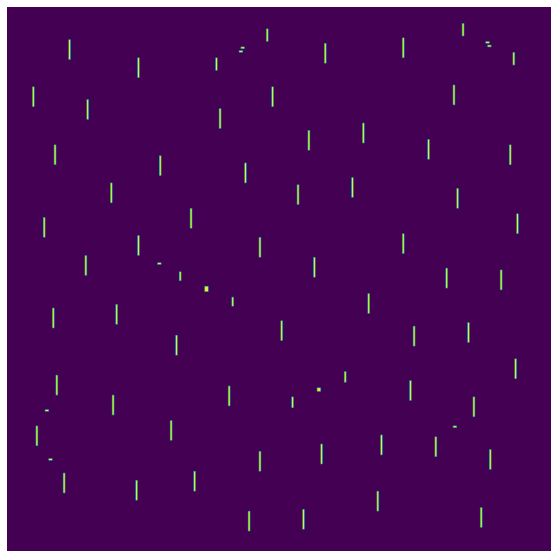

In [3]:
im = np.zeros([300, 300])
im = ps.generators.RSA(im, radius=15, volume_fraction=0.5)
dt = ps.filters.distance_transform_lin(im, axis = 1, mode = "both")
r_max = 4
footprint = None
peaks = ps.filters.find_peaks(dt, r_max=4, footprint=None)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(peaks)

## Apply filter function:
With different parameters

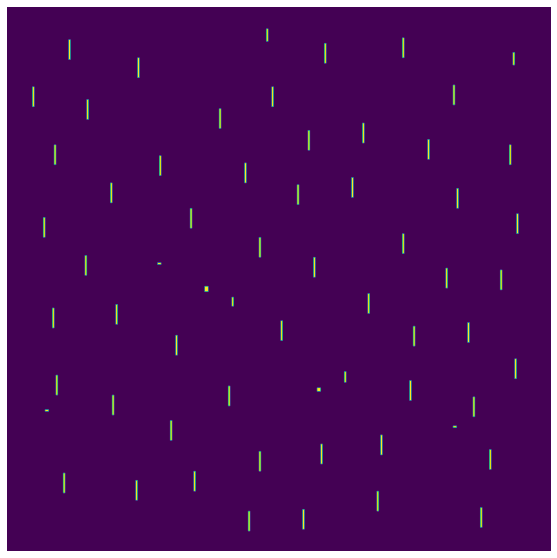

In [4]:
x = ps.filters.trim_nearby_peaks(peaks=peaks, dt=dt)
plt.figure(figsize=[10, 10])
plt.axis(False)
plt.imshow(x)